# Acceleration Time vs Driving Range of Electric Vehicles

In this example, we show two conflicting objective functions representing the acceleration time (0-60 mi/h) and driving range of electric vehicles (EVs). The goal is to minimize acceleration time while maximizing the driving range.

The data is collected from <a href="https://insideevs.com/news/534101/electric-cars-60mph-acceleration-20210919/">InsideEVs website</a> and is dated September 18, 2021.

EPA range is the approximate number of miles that a vehicle can travel in combined city and highway driving (using a mix of 55% highway and 45% city driving) before needing to be recharged, according to the US Environmental Protection Agency (EPA)'s testing methodology.

0 to 60 mph acceleration time, aka zero to sixty, is the time it takes a vehicle to accelerate from 0 to 60 miles per hour (0 to 97 km/h).

In [1]:
from importlib.metadata import version

pkgs = ["matplotlib",
        "pandas",
        "adjustText"
       ]
for p in pkgs:
    print(f"{p} version: {version(p)}")

matplotlib version: 3.6.3
pandas version: 2.1.4
adjustText version: 1.1.1


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

In [3]:
ev_data = {'Model': ['BMW i3s','Chevrolet Bolt EUV','Chevrolet Bolt EV','Ford Mustang Mach-E GT ER','Hyundai IONIQ', 
                  'Hyundai Kona','Jaguar I-PACE EV400','Kia Niro','Lucid Air Dream Edition','Nissan LEAF e+ S',
                  'Porsche Taycan 4','Rivian R1S','Tesla Model S Long Range','Tesla Model S Plaid','Tesla Model X Plaid',
                  'Volkswagen ID.4','Volvo XC40 Recharge','Polestar 2 Dual Motor','Audi e-tron GT'], 
        'Year': [2021,2022,2022,2021,2021,
                 2022,2022,2022,2022,2022,
                 2021,2022,2021,2021,2021,
                 2021,2022,2022,2022],
        'EPA Range (mile)': [153,247,259,260,170,
                             258,234,239,520,226,
                             215,316,405,396,340,
                             249,223,249,238],
        'Acceleration time 0-60 (s)': [6.8,7,6.5,3.5,10,
                                       7.9,4.5,7.5,2.7,6.5,
                                       4.8,3,3.1,1.99,2.5,5.7,
                                       4.7,4.5,3.9]}
df = pd.DataFrame(data=ev_data)
df

,Model,Year,EPA Range (mile),Acceleration time 0-60 (s)
0,BMW i3s,2021,153,6.80
1,Chevrolet Bolt EUV,2022,247,7.00
2,Chevrolet Bolt EV,2022,259,6.50
3,Ford Mustang Mach-E GT ER,2021,260,3.50
4,Hyundai IONIQ,2021,170,10.00
5,Hyundai Kona,2022,258,7.90
6,Jaguar I-PACE EV400,2022,234,4.50
7,Kia Niro,2022,239,7.50
8,Lucid Air Dream Edition,2022,520,2.70
9,Nissan LEAF e+ S,2022,226,6.50


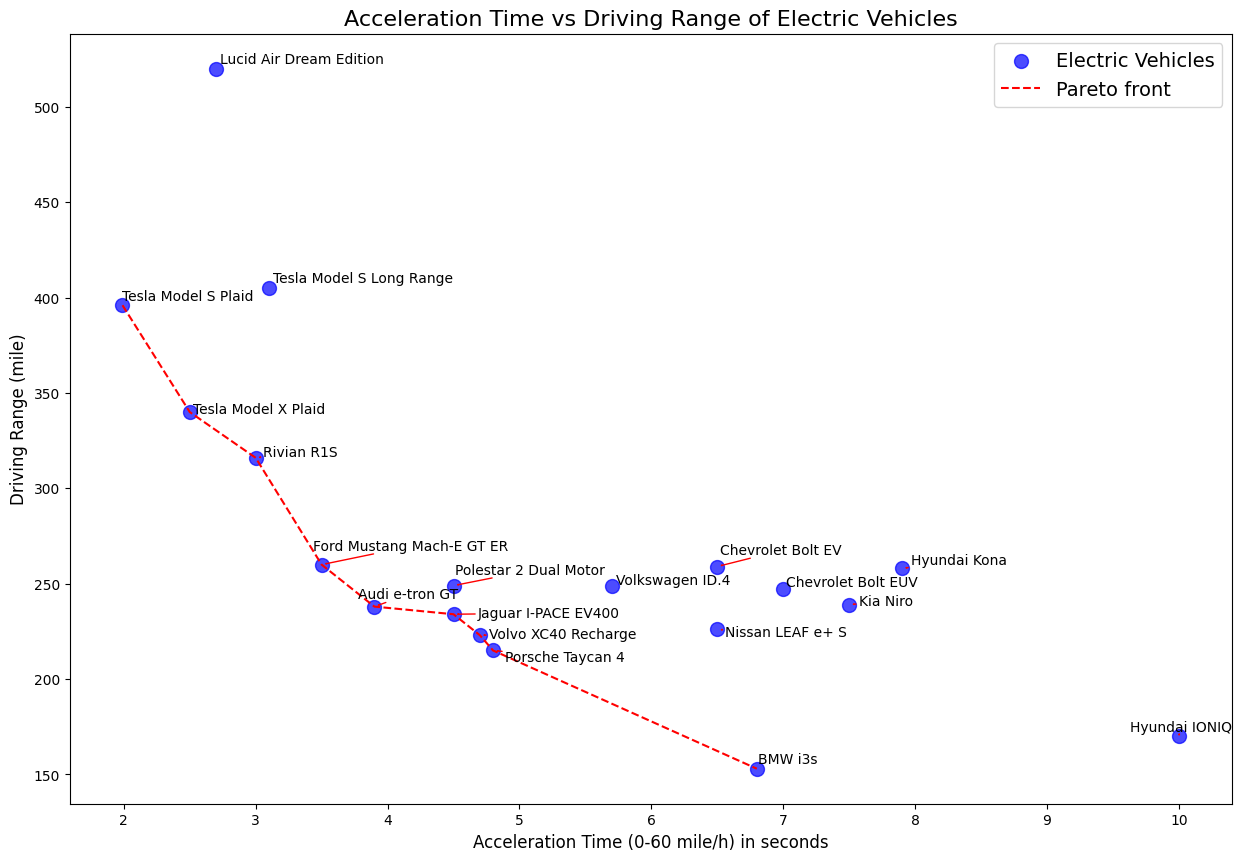

In [4]:
vehicle_models =df['Model']
driving_ranges =df['EPA Range (mile)']
acceleration_times =df['Acceleration time 0-60 (s)']

# Create a scatter plot of acceleration times vs. EPA ranges
plt.figure(figsize=(15, 10))
plt.scatter(acceleration_times, driving_ranges, alpha=0.7, label='Electric Vehicles', c='blue', marker='o', s=100)

# Add the vehicle models as text labels and store them in a list for adjustment
texts = []
for i, model in enumerate(vehicle_models):
    texts.append(plt.annotate(model, (acceleration_times[i], driving_ranges[i]), fontsize=10))  # Increased fontsize to 12

# Adjust the text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Find the Pareto front using a loop
pareto_front = []
for i, (x1, y1) in enumerate(zip(acceleration_times, driving_ranges)):
    is_pareto = True
    for j, (x2, y2) in enumerate(zip(acceleration_times, driving_ranges)):
        if x2 < x1 and y2 < y1:
            is_pareto = False
            break
    if is_pareto:
        pareto_front.append((x1, y1))

# Sort the Pareto front by acceleration time
pareto_front.sort(key=lambda x: x[0])

# Add a dotted line connecting the Pareto points
x_vals = [x[0] for x in pareto_front]
y_vals = [x[1] for x in pareto_front]
plt.plot(x_vals, y_vals, linestyle='--', color='red', label='Pareto front')

# Set the x and y axis labels
plt.xlabel('Acceleration Time (0-60 mile/h) in seconds', fontsize=12)
plt.ylabel('Driving Range (mile)', fontsize=12)
plt.title('Acceleration Time vs Driving Range of Electric Vehicles', fontsize=16)
plt.legend(fontsize=14)
# plt.gca().invert_xaxis()  # Invert the x-axis as lower acceleration times are better
plt.show()
# plt.savefig('CH08_F12_Pareto_front.png', bbox_inches='tight',dpi=300)